<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Evolution-of-Basketball" data-toc-modified-id="Evolution-of-Basketball-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Evolution of Basketball</a></span><ul class="toc-item"><li><span><a href="#Problem-Statement:" data-toc-modified-id="Problem-Statement:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem Statement:</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Expected-points-for-league-average-3-point-attempt:" data-toc-modified-id="Expected-points-for-league-average-3-point-attempt:-1.1.0.1"><span class="toc-item-num">1.1.0.1&nbsp;&nbsp;</span>Expected points for league average 3 point attempt:</a></span></li><li><span><a href="#Equivalent-percentage-needed-on-2-point-attempts:" data-toc-modified-id="Equivalent-percentage-needed-on-2-point-attempts:-1.1.0.2"><span class="toc-item-num">1.1.0.2&nbsp;&nbsp;</span>Equivalent percentage needed on 2 point attempts:</a></span></li></ul></li></ul></li><li><span><a href="#Background" data-toc-modified-id="Background-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Background</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Imports</a></span></li></ul></li><li><span><a href="#Background-Info" data-toc-modified-id="Background-Info-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Background Info</a></span><ul class="toc-item"><li><span><a href="#Bringing-in-2020-2021-Season-Game-Data-from-NBA-API" data-toc-modified-id="Bringing-in-2020-2021-Season-Game-Data-from-NBA-API-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Bringing in 2020-2021 Season Game Data from NBA API</a></span></li><li><span><a href="#Minutes-feature:" data-toc-modified-id="Minutes-feature:-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Minutes feature:</a></span></li><li><span><a href="#Combining-the-dataframes-into-a-single-one-for-clustering" data-toc-modified-id="Combining-the-dataframes-into-a-single-one-for-clustering-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Combining the dataframes into a single one for clustering</a></span></li><li><span><a href="#KMeans" data-toc-modified-id="KMeans-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>KMeans</a></span></li></ul></li></ul></li></ul></div>

# Evolution of Basketball

## Problem Statement:

There was a statement by a LA Clippers broadcaster, called Lawler's Law, that says generally the first team to score 100 points will win the game. Historically this benchmark generally holds true. However, with several teams currently averaging over 120 points per game, and league wide the average score of 112 points; 100 points isn't worth as much as it used to be.

The game of basketball in the NBA has changed drastically from when players mostly stuck to their roles to a game where traditional positions are much more fluid. I will cluster / classify players into new roles in order to update the traditional basketball positions and define their new roles.

#### Expected points for league average 3 point attempt:

In [1]:
#https://www.basketball-reference.com/leagues/NBA_2021.html
.365*3

1.095

#### Equivalent percentage needed on 2 point attempts:

In [2]:
.365*3 / 2

0.5475

## Background

The middle of the road ranked team in the NBA by 3 point shot made percentage makes about 36.5% of three point shots, for an expected point value of 1.095 points for every 3 point shot taken.

In order to equal that with a 2 point shot, a team would have to make 54.8% of all 2 point shots.

When ranking by distance from the hoop, the team with the highest shooting percentage (WAS) shoots 50% from 3 ft - 10 ft, (BKN) 49.3% from 10 ft - 16 ft, (NOP) 48.5% from 16 ft to the 3 point line. The worst shooting team from 0 ft - 3 ft has a shooting percentage of 60%.

Based on data being brought in to team strategy, players and coaches figured out that it makes the most sense to either shoot very close to the basket or to shoot from the 3 point line.

My goal is for Clustering to capture a player's style of play and cluster accordingly. This may take players that are traditionally categorized as different positions, but actually have many similarities in style.

### Imports

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, KMeans
from pandasql import sqldf

## Background Info

I picked a player that has played in both a more traditional role several years ago and has expanded / evolved his style of play with the current way basketball is played at the NBA level.



### Bringing in 2020-2021 Season Game Data from NBA API

https://github.com/swar/nba_api

In [4]:
df_p = pd.read_csv('../data/play_by_play.csv')

In [5]:
df_t = pd.read_csv('../data/player_tracking.csv')

In [6]:
df_bs = pd.read_csv('../data/boxscore_scoring.csv')

In [7]:
df_bt = pd.read_csv('../data/boxscore_traditional.csv')

In [8]:
df_p.columns

Index(['GAME_ID', 'EVENTNUM', 'EVENTMSGTYPE', 'EVENTMSGACTIONTYPE', 'PERIOD',
       'WCTIMESTRING', 'PCTIMESTRING', 'HOMEDESCRIPTION', 'NEUTRALDESCRIPTION',
       'VISITORDESCRIPTION', 'SCORE', 'SCOREMARGIN', 'PERSON1TYPE',
       'PLAYER1_ID', 'PLAYER1_NAME', 'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_CITY',
       'PLAYER1_TEAM_NICKNAME', 'PLAYER1_TEAM_ABBREVIATION', 'PERSON2TYPE',
       'PLAYER2_ID', 'PLAYER2_NAME', 'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_CITY',
       'PLAYER2_TEAM_NICKNAME', 'PLAYER2_TEAM_ABBREVIATION', 'PERSON3TYPE',
       'PLAYER3_ID', 'PLAYER3_NAME', 'PLAYER3_TEAM_ID', 'PLAYER3_TEAM_CITY',
       'PLAYER3_TEAM_NICKNAME', 'PLAYER3_TEAM_ABBREVIATION',
       'VIDEO_AVAILABLE_FLAG'],
      dtype='object')

In [9]:
df_p.head()

,GAME_ID,EVENTNUM,EVENTMSGTYPE,EVENTMSGACTIONTYPE,PERIOD,WCTIMESTRING,PCTIMESTRING,HOMEDESCRIPTION,NEUTRALDESCRIPTION,VISITORDESCRIPTION,...,PLAYER2_TEAM_NICKNAME,PLAYER2_TEAM_ABBREVIATION,PERSON3TYPE,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ID,PLAYER3_TEAM_CITY,PLAYER3_TEAM_NICKNAME,PLAYER3_TEAM_ABBREVIATION,VIDEO_AVAILABLE_FLAG
0,22000482,2,12,0,1,7:42 PM,12:00,NaN,NaN,NaN,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,0
1,22000482,4,10,0,1,7:42 PM,12:00,Jump Ball Jordan vs. Bagley III: Tip to Brown,NaN,NaN,...,Kings,SAC,4,1628971,Bruce Brown,1.610613e+09,Brooklyn,Nets,BKN,1
2,22000482,7,1,79,1,7:42 PM,11:39,Irving 14' Pullup Jump Shot (2 PTS),NaN,NaN,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,1
3,22000482,8,2,79,1,7:42 PM,11:25,NaN,NaN,MISS Fox 11' Pullup Jump Shot,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,1
4,22000482,9,4,0,1,7:42 PM,11:22,Jordan REBOUND (Off:0 Def:1),NaN,NaN,...,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,1


In [10]:
df_t.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,SPD,...,CFGM,CFGA,CFG_PCT,UFGM,UFGA,UFG_PCT,FG_PCT,DFGM,DFGA,DFG_PCT
0,22000482,1610612758,SAC,Sacramento,203084,Harrison Barnes,F,NaN,36:42,0.0,...,0,0,0.0,0,0,0.0,0.636,0,0,0.0
1,22000482,1610612758,SAC,Sacramento,1628963,Marvin Bagley III,F,NaN,30:13,0.0,...,0,0,0.0,0,0,0.0,0.500,0,0,0.0
2,22000482,1610612758,SAC,Sacramento,1626158,Richaun Holmes,C,NaN,26:17,0.0,...,0,0,0.0,0,0,0.0,0.750,0,0,0.0
3,22000482,1610612758,SAC,Sacramento,1627741,Buddy Hield,G,NaN,36:34,0.0,...,0,0,0.0,0,0,0.0,0.333,0,0,0.0
4,22000482,1610612758,SAC,Sacramento,1628368,De'Aaron Fox,G,NaN,38:29,0.0,...,0,0,0.0,0,0,0.0,0.500,0,0,0.0


In [11]:
df_t.dtypes

GAME_ID                int64
TEAM_ID                int64
TEAM_ABBREVIATION     object
TEAM_CITY             object
PLAYER_ID              int64
PLAYER_NAME           object
START_POSITION        object
COMMENT               object
MIN                   object
SPD                  float64
DIST                 float64
ORBC                   int64
DRBC                   int64
RBC                    int64
TCHS                   int64
SAST                   int64
FTAST                  int64
PASS                   int64
AST                    int64
CFGM                   int64
CFGA                   int64
CFG_PCT              float64
UFGM                   int64
UFGA                   int64
UFG_PCT              float64
FG_PCT               float64
DFGM                   int64
DFGA                   int64
DFG_PCT              float64
dtype: object

In [12]:
df_bs.shape

(28178, 24)

In [13]:
df_bs.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,PCT_FGA_2PT,...,PCT_PTS_FB,PCT_PTS_FT,PCT_PTS_OFF_TOV,PCT_PTS_PAINT,PCT_AST_2PM,PCT_UAST_2PM,PCT_AST_3PM,PCT_UAST_3PM,PCT_AST_FGM,PCT_UAST_FGM
0,22000558,1610612758,SAC,Sacramento,203084,Harrison Barnes,F,NaN,37:38,0.929,...,0.000,0.176,0.235,0.706,0.714,0.286,0.0,0.0,0.714,0.286
1,22000558,1610612758,SAC,Sacramento,1628963,Marvin Bagley III,F,NaN,31:47,0.769,...,0.357,0.071,0.143,0.714,0.600,0.400,1.0,0.0,0.667,0.333
2,22000558,1610612758,SAC,Sacramento,1626158,Richaun Holmes,C,NaN,30:46,1.000,...,0.000,0.000,0.000,0.833,0.667,0.333,0.0,0.0,0.667,0.333
3,22000558,1610612758,SAC,Sacramento,1627741,Buddy Hield,G,NaN,37:02,0.294,...,0.143,0.000,0.286,0.190,0.333,0.667,0.8,0.2,0.625,0.375
4,22000558,1610612758,SAC,Sacramento,1628368,De'Aaron Fox,G,NaN,38:50,0.769,...,0.188,0.188,0.219,0.438,0.000,1.000,0.5,0.5,0.083,0.917


In [14]:
df_bs.shape

(28178, 24)

In [15]:
df_t.shape

(24532, 29)

In [16]:
df_bs.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'PCT_FGA_2PT',
       'PCT_FGA_3PT', 'PCT_PTS_2PT', 'PCT_PTS_2PT_MR', 'PCT_PTS_3PT',
       'PCT_PTS_FB', 'PCT_PTS_FT', 'PCT_PTS_OFF_TOV', 'PCT_PTS_PAINT',
       'PCT_AST_2PM', 'PCT_UAST_2PM', 'PCT_AST_3PM', 'PCT_UAST_3PM',
       'PCT_AST_FGM', 'PCT_UAST_FGM'],
      dtype='object')

In [17]:
['s.'+i.lower() for i in ['PCT_FGA_2PT',
       'PCT_FGA_3PT', 'PCT_PTS_2PT', 'PCT_PTS_2PT_MR', 'PCT_PTS_3PT',
       'PCT_PTS_FB', 'PCT_PTS_FT', 'PCT_PTS_OFF_TOV', 'PCT_PTS_PAINT',
       'PCT_AST_2PM', 'PCT_UAST_2PM', 'PCT_AST_3PM', 'PCT_UAST_3PM',
       'PCT_AST_FGM', 'PCT_UAST_FGM']]

['s.pct_fga_2pt',
 's.pct_fga_3pt',
 's.pct_pts_2pt',
 's.pct_pts_2pt_mr',
 's.pct_pts_3pt',
 's.pct_pts_fb',
 's.pct_pts_ft',
 's.pct_pts_off_tov',
 's.pct_pts_paint',
 's.pct_ast_2pm',
 's.pct_uast_2pm',
 's.pct_ast_3pm',
 's.pct_uast_3pm',
 's.pct_ast_fgm',
 's.pct_uast_fgm']

In [18]:
df_bt.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS'],
      dtype='object')

In [19]:
['b.'+i.lower() for i in ['FGM', 'FGA',
       'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB',
       'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS']
    
    
]

['b.fgm',
 'b.fga',
 'b.fg_pct',
 'b.fg3m',
 'b.fg3a',
 'b.fg3_pct',
 'b.ftm',
 'b.fta',
 'b.ft_pct',
 'b.oreb',
 'b.dreb',
 'b.reb',
 'b.ast',
 'b.stl',
 'b.blk',
 'b.to',
 'b.pf',
 'b.pts']

In [20]:
df_t.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'START_POSITION', 'COMMENT', 'MIN', 'SPD', 'DIST',
       'ORBC', 'DRBC', 'RBC', 'TCHS', 'SAST', 'FTAST', 'PASS', 'AST', 'CFGM',
       'CFGA', 'CFG_PCT', 'UFGM', 'UFGA', 'UFG_PCT', 'FG_PCT', 'DFGM', 'DFGA',
       'DFG_PCT'],
      dtype='object')

In [21]:
df_bs.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,PCT_FGA_2PT,...,PCT_PTS_FB,PCT_PTS_FT,PCT_PTS_OFF_TOV,PCT_PTS_PAINT,PCT_AST_2PM,PCT_UAST_2PM,PCT_AST_3PM,PCT_UAST_3PM,PCT_AST_FGM,PCT_UAST_FGM
0,22000558,1610612758,SAC,Sacramento,203084,Harrison Barnes,F,NaN,37:38,0.929,...,0.000,0.176,0.235,0.706,0.714,0.286,0.0,0.0,0.714,0.286
1,22000558,1610612758,SAC,Sacramento,1628963,Marvin Bagley III,F,NaN,31:47,0.769,...,0.357,0.071,0.143,0.714,0.600,0.400,1.0,0.0,0.667,0.333
2,22000558,1610612758,SAC,Sacramento,1626158,Richaun Holmes,C,NaN,30:46,1.000,...,0.000,0.000,0.000,0.833,0.667,0.333,0.0,0.0,0.667,0.333
3,22000558,1610612758,SAC,Sacramento,1627741,Buddy Hield,G,NaN,37:02,0.294,...,0.143,0.000,0.286,0.190,0.333,0.667,0.8,0.2,0.625,0.375
4,22000558,1610612758,SAC,Sacramento,1628368,De'Aaron Fox,G,NaN,38:50,0.769,...,0.188,0.188,0.219,0.438,0.000,1.000,0.5,0.5,0.083,0.917


In [22]:
df_bt.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22000557,1610612748,MIA,Miami,1629130,Duncan Robinson,F,NaN,28:28,2.0,...,0.0,5.0,5.0,4.0,0.0,0.0,0.0,2.0,5.0,-1.0
1,22000557,1610612748,MIA,Miami,203482,Kelly Olynyk,F,NaN,36:45,7.0,...,1.0,9.0,10.0,7.0,1.0,0.0,3.0,4.0,18.0,19.0
2,22000557,1610612748,MIA,Miami,1629644,KZ Okpala,C,NaN,17:26,2.0,...,1.0,4.0,5.0,0.0,0.0,2.0,0.0,3.0,5.0,10.0
3,22000557,1610612748,MIA,Miami,1629134,Kendrick Nunn,G,NaN,25:19,4.0,...,1.0,3.0,4.0,1.0,0.0,0.0,1.0,2.0,13.0,1.0
4,22000557,1610612748,MIA,Miami,202710,Jimmy Butler,G,NaN,34:03,10.0,...,0.0,3.0,3.0,9.0,3.0,0.0,3.0,3.0,29.0,11.0


### Minutes feature:

Clustering would group together starters playing heavy minutes versus players that don't get as much playing time if Minutes or Touches (amount of times a game a player touches the ball) are used. To keep the clustering based on play style *but* still trying to determine which player the offense flows through, I decided to create a metric: Touches per Minute.

In [23]:
df_bt['MIN'].dtype

dtype('O')

In [24]:
df_bt['MIN'].fillna('00:00')

0        28:28
1        36:45
2        17:26
3        25:19
4        34:03
         ...  
28173    16:40
28174    10:51
28175     1:23
28176    00:00
28177    00:00
Name: MIN, Length: 28178, dtype: object

In [25]:
mins = [int(str(i).split(':')[0]) for i in df_bt['MIN'].fillna('00:00')]
secs = [int(str(i).split(':')[1]) for i in df_bt['MIN'].fillna('00:00')]

In [26]:
secs = [round(((i)/60),2) for i in secs]

In [27]:
df_bt['MIN'] = [i+j for i, j in zip(mins, secs)]

### Combining the dataframes into a single one for clustering

In [28]:
sql = """
SELECT s.game_id, s.player_id, s.player_name,  s.pct_fga_2pt, s.pct_fga_3pt, s.pct_pts_2pt, s.pct_pts_2pt_mr, s.pct_pts_3pt, s.pct_pts_fb, s.pct_pts_ft, s.pct_pts_off_tov, s.pct_pts_paint, s.pct_ast_2pm, s.pct_uast_2pm, s.pct_ast_3pm, s.pct_uast_3pm, s.pct_ast_fgm, s.pct_uast_fgm, 
b.min, b.fgm, b.fga, b.fg_pct, b.fg3m, b.fg3a, b.fg3_pct, b.ftm, b.fta, b.oreb, b.dreb, b.reb, b.ast, b.stl, b.blk, b.pf, b.pts,
t.spd, t.dist, t.orbc, t.drbc, t.rbc, t.tchs/b.min as tchs_per_min, t.sast, t.ftast, t.pass, t.cfga, t.cfg_pct, t.ufga, t.ufg_pct, t.dfga, t.dfg_pct
FROM df_bs as s
INNER JOIN df_bt as b ON b.game_id = s.game_id AND b.player_id = s.player_id
INNER JOIN df_t as t ON t.game_id = s.game_id AND t.player_id = s.player_id;
"""

df = sqldf(sql)
df.head()

,GAME_ID,PLAYER_ID,PLAYER_NAME,PCT_FGA_2PT,PCT_FGA_3PT,PCT_PTS_2PT,PCT_PTS_2PT_MR,PCT_PTS_3PT,PCT_PTS_FB,PCT_PTS_FT,...,tchs_per_min,SAST,FTAST,PASS,CFGA,CFG_PCT,UFGA,UFG_PCT,DFGA,DFG_PCT
0,22000488,1629726,Garrison Mathews,0.333,0.667,0.25,0.25,0.75,0.0,0.0,...,0.0,0,0,0,0,0.0,0,0.0,0,0.0
1,22000488,1629726,Garrison Mathews,0.333,0.667,0.25,0.25,0.75,0.0,0.0,...,0.0,0,0,0,0,0.0,0,0.0,0,0.0
2,22000488,1629726,Garrison Mathews,0.333,0.667,0.25,0.25,0.75,0.0,0.0,...,0.0,0,0,0,0,0.0,0,0.0,0,0.0
3,22000488,1629726,Garrison Mathews,0.333,0.667,0.25,0.25,0.75,0.0,0.0,...,0.0,0,0,0,0,0.0,0,0.0,0,0.0
4,22000488,1629060,Rui Hachimura,0.750,0.250,0.40,0.40,0.60,0.2,0.0,...,0.0,0,0,0,0,0.0,0,0.0,0,0.0


In [29]:
df.dropna(inplace = True)

In [30]:
df['PLAYER_NAME'].value_counts()

Ivica Zubac         264
Joe Harris          264
Fred VanVleet       256
LeBron James        256
Donte DiVincenzo    256
                   ... 
Nicolas Claxton       8
Anzejs Pasecniks      8
Brian Bowen II        8
Iman Shumpert         8
Patrick McCaw         8
Name: PLAYER_NAME, Length: 488, dtype: int64

In [31]:
X = df

In [32]:
X = X[(X['SPD'] != 0) & (X['MIN'] > 5)]

In [33]:
cols = [i for i in X.drop(columns=['PLAYER_NAME', 'GAME_ID', 'PLAYER_ID', 'MIN']).columns]

In [34]:
X_group = X.groupby('PLAYER_NAME')[cols].mean()

In [35]:
ss = StandardScaler()

### KMeans

I used 5 as the number of clusters because each team has 5 players on the court at a time.

In [36]:
km = KMeans(n_clusters=5, random_state=824)

In [37]:
Xs = ss.fit_transform(X_group)
km.fit(Xs)

KMeans(n_clusters=5, random_state=824)

In [38]:
X_group['KMeans_label'] = km.labels_
X_group.head()

,PCT_FGA_2PT,PCT_FGA_3PT,PCT_PTS_2PT,PCT_PTS_2PT_MR,PCT_PTS_3PT,PCT_PTS_FB,PCT_PTS_FT,PCT_PTS_OFF_TOV,PCT_PTS_PAINT,PCT_AST_2PM,...,SAST,FTAST,PASS,CFGA,CFG_PCT,UFGA,UFG_PCT,DFGA,DFG_PCT,KMeans_label
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
Aaron Gordon,0.605632,0.394421,0.448421,0.098421,0.335684,0.079105,0.215947,0.132421,0.349895,0.433105,...,0.947368,0.526316,46.315789,4.105263,0.422842,7.105263,0.402632,2.894737,0.566368,1
Aaron Holiday,0.570034,0.430000,0.426828,0.037724,0.409517,0.211586,0.094759,0.174483,0.389103,0.355759,...,0.517241,0.275862,15.137931,3.344828,0.359172,4.241379,0.424379,1.172414,0.390793,0
Aaron Nesmith,0.217077,0.782923,0.183231,0.014000,0.429615,0.029385,0.079462,0.102538,0.169231,0.230769,...,0.230769,0.000000,11.538462,0.461538,0.192308,3.384615,0.261769,1.615385,0.576923,3
Abdel Nader,0.598636,0.401364,0.476273,0.000000,0.298364,0.108727,0.134455,0.080273,0.476273,0.696909,...,0.090909,0.000000,11.181818,2.181818,0.418182,3.272727,0.426000,1.181818,0.287909,4
Adam Mokoka,0.444333,0.555667,0.666667,0.000000,0.333333,0.333333,0.000000,0.500000,0.666667,0.000000,...,0.000000,0.000000,8.000000,2.000000,0.500000,2.333333,0.416667,0.333333,0.000000,4


In [39]:
X_group.columns

Index(['PCT_FGA_2PT', 'PCT_FGA_3PT', 'PCT_PTS_2PT', 'PCT_PTS_2PT_MR',
       'PCT_PTS_3PT', 'PCT_PTS_FB', 'PCT_PTS_FT', 'PCT_PTS_OFF_TOV',
       'PCT_PTS_PAINT', 'PCT_AST_2PM', 'PCT_UAST_2PM', 'PCT_AST_3PM',
       'PCT_UAST_3PM', 'PCT_AST_FGM', 'PCT_UAST_FGM', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'PF', 'PTS', 'SPD', 'DIST', 'ORBC', 'DRBC', 'RBC',
       'tchs_per_min', 'SAST', 'FTAST', 'PASS', 'CFGA', 'CFG_PCT', 'UFGA',
       'UFG_PCT', 'DFGA', 'DFG_PCT', 'KMeans_label'],
      dtype='object')

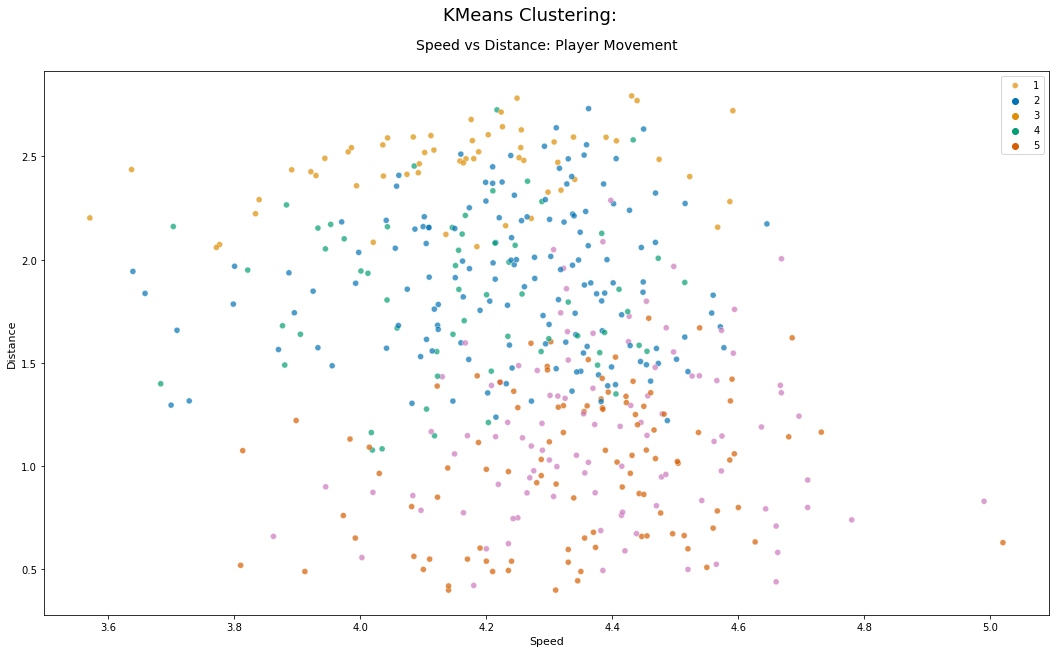

In [54]:
#https://stackoverflow.com/questions/1388450/giving-graphs-a-subtitle-in-matplotlib
plt.figure(figsize=(18,10))
plt.title('Speed vs Distance: Player Movement\n', fontsize=14)
plt.suptitle('KMeans Clustering:', y=0.97, fontsize=18, ha='center')
sns.color_palette("rocket", as_cmap=True)
sns.scatterplot(x=X_group['SPD'], y=X_group['DIST'], hue=X_group['KMeans_label'], palette='colorblind', alpha=0.7)
plt.ylabel('Distance', fontsize=11)
plt.xlabel('Speed', fontsize=11)
plt.legend([1, 2, 3, 4, 5])

In [63]:
X_group[X_group['KMeans_label'] == 4].sample(10)

,PCT_FGA_2PT,PCT_FGA_3PT,PCT_PTS_2PT,PCT_PTS_2PT_MR,PCT_PTS_3PT,PCT_PTS_FB,PCT_PTS_FT,PCT_PTS_OFF_TOV,PCT_PTS_PAINT,PCT_AST_2PM,...,SAST,FTAST,PASS,CFGA,CFG_PCT,UFGA,UFG_PCT,DFGA,DFG_PCT,KMeans_label
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
Kevon Looney,0.873048,0.126952,0.791952,0.031762,0.049000,0.015857,0.111429,0.358952,0.760190,0.680952,...,0.238095,0.000000,18.428571,1.476190,0.369810,1.000000,0.492048,2.333333,0.503190,4
Bruno Fernando,0.741700,0.058300,0.426700,0.000000,0.000000,0.040000,0.173300,0.113300,0.426700,0.350000,...,0.000000,0.000000,16.400000,1.400000,0.350000,0.400000,0.200000,1.900000,0.616700,4
PJ Dozier,0.622437,0.377563,0.570750,0.045813,0.281438,0.148313,0.147750,0.290688,0.524875,0.630187,...,0.062500,0.062500,18.187500,2.562500,0.477062,2.937500,0.347187,2.125000,0.614562,4
Kenyon Martin Jr.,0.789000,0.211000,0.664200,0.000000,0.085800,0.114200,0.050000,0.180800,0.664200,0.566800,...,0.000000,0.000000,10.800000,3.000000,0.186600,1.800000,0.466600,1.400000,0.266600,4
Nick Richards,1.000000,0.000000,0.333500,0.000000,0.000000,0.000000,0.666500,0.000000,0.333500,0.500000,...,0.000000,0.000000,5.500000,1.500000,0.500000,0.000000,0.000000,1.000000,0.250000,4
Caleb Martin,0.563227,0.436773,0.534091,0.108682,0.251682,0.136136,0.168727,0.146182,0.425545,0.435636,...,0.181818,0.181818,14.227273,1.818182,0.397727,3.545455,0.358091,1.818182,0.409091,4
Rodney McGruder,0.705500,0.294500,0.552833,0.083333,0.225000,0.229167,0.222167,0.145833,0.469500,0.250000,...,0.000000,0.166667,14.500000,1.500000,0.444500,1.500000,0.222167,0.833333,0.333333,4
Tyrese Maxey,0.791185,0.208815,0.738519,0.175222,0.109556,0.175889,0.077852,0.202519,0.563333,0.288000,...,0.333333,0.259259,29.518519,3.962963,0.399444,4.777778,0.398481,1.296296,0.493815,4
Onyeka Okongwu,0.982125,0.017875,0.694500,0.000000,0.000000,0.000000,0.180500,0.041625,0.694500,0.750000,...,0.000000,0.000000,8.875000,2.500000,0.554125,0.625000,0.187500,2.250000,0.322875,4


Players in category 4 generally shoot close to the basket or from 3-point range. 

In [42]:
X_group[X_group['KMeans_label'] == 3].sample(10)

,PCT_FGA_2PT,PCT_FGA_3PT,PCT_PTS_2PT,PCT_PTS_2PT_MR,PCT_PTS_3PT,PCT_PTS_FB,PCT_PTS_FT,PCT_PTS_OFF_TOV,PCT_PTS_PAINT,PCT_AST_2PM,...,SAST,FTAST,PASS,CFGA,CFG_PCT,UFGA,UFG_PCT,DFGA,DFG_PCT,KMeans_label
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
Isaac Bonga,0.278571,0.578571,0.169357,0.000000,0.373500,0.102071,0.028571,0.107143,0.169357,0.250000,...,0.071429,0.142857,12.714286,0.785714,0.142857,1.857143,0.363071,1.714286,0.411929,3
Jalen Smith,0.666600,0.333400,0.480000,0.100000,0.320000,0.100000,0.000000,0.000000,0.380000,0.400000,...,0.000000,0.000000,6.200000,1.200000,0.200000,1.600000,0.600000,1.000000,0.333400,3
Anthony Gill,0.250000,0.750000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,...,0.000000,0.333333,15.333333,0.333333,0.333333,2.000000,0.000000,1.000000,0.666667,3
Quinn Cook,0.541750,0.458250,0.509500,0.171500,0.357250,0.107250,0.133250,0.178500,0.338250,0.250000,...,0.000000,0.250000,9.750000,0.750000,0.375000,3.000000,0.437500,0.500000,0.500000,3
Aleksej Pokusevski,0.345824,0.654176,0.408353,0.128588,0.356353,0.129412,0.000000,0.089941,0.279824,0.235294,...,0.058824,0.117647,18.823529,1.294118,0.239235,4.176471,0.241176,2.705882,0.588235,3
R.J. Hampton,0.580538,0.342538,0.469923,0.120846,0.245462,0.093538,0.130769,0.034154,0.349077,0.307692,...,0.076923,0.000000,10.846154,1.538462,0.192308,2.076923,0.412846,2.153846,0.698692,3
Jaylen Adams,0.750000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,13.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,3
Josh Hall,0.494500,0.338833,0.222333,0.000000,0.166667,0.111167,0.111000,0.055500,0.222333,0.250000,...,0.000000,0.000000,6.833333,0.833333,0.277833,2.000000,0.033333,0.666667,0.250000,3
Jalen Lecque,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,3


Players in Group 3 tallied the least number of passes. They also have extremely low percentage of 2-point shots from midrange.

In [43]:
X_group[X_group['KMeans_label'] == 2].sample(10)

,PCT_FGA_2PT,PCT_FGA_3PT,PCT_PTS_2PT,PCT_PTS_2PT_MR,PCT_PTS_3PT,PCT_PTS_FB,PCT_PTS_FT,PCT_PTS_OFF_TOV,PCT_PTS_PAINT,PCT_AST_2PM,...,SAST,FTAST,PASS,CFGA,CFG_PCT,UFGA,UFG_PCT,DFGA,DFG_PCT,KMeans_label
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
Zion Williamson,0.964931,0.035172,0.747897,0.002172,0.023759,0.085552,0.228310,0.131310,0.745759,0.586724,...,0.310345,0.379310,31.965517,12.068966,0.604517,3.551724,0.707897,3.241379,0.600690,2
Domantas Sabonis,0.811759,0.188310,0.652897,0.021724,0.141379,0.069897,0.205897,0.144759,0.631138,0.606172,...,0.379310,0.448276,76.758621,8.862069,0.569172,6.620690,0.463621,7.068966,0.587310,2
Tristan Thompson,0.986111,0.013889,0.784963,0.042333,0.000000,0.057519,0.178000,0.144037,0.742630,0.484741,...,0.111111,0.111111,22.777778,4.777778,0.478815,1.259259,0.370370,4.370370,0.671333,2
Jonas Valanciunas,0.890000,0.110000,0.770545,0.025364,0.057909,0.027227,0.171455,0.138318,0.745227,0.585091,...,0.090909,0.181818,40.681818,7.409091,0.577045,4.090909,0.476500,5.818182,0.584909,2
Jordan Bell,0.844500,0.155500,1.000000,0.000000,0.000000,0.250000,0.000000,0.250000,1.000000,0.750000,...,0.000000,0.000000,38.000000,4.000000,0.166500,3.000000,0.333500,3.500000,0.650000,2
DeAndre Jordan,1.000000,0.000000,0.847517,0.000000,0.000000,0.029448,0.152483,0.106483,0.847517,0.771828,...,0.241379,0.172414,24.482759,3.034483,0.771207,1.034483,0.577586,3.379310,0.583586,2
Ivica Zubac,0.996094,0.003906,0.769625,0.007812,0.000000,0.057531,0.230375,0.038562,0.761813,0.753906,...,0.062500,0.125000,26.687500,3.906250,0.650188,0.812500,0.447938,4.093750,0.603469,2
Myles Turner,0.505222,0.494778,0.476000,0.062333,0.344778,0.086185,0.179185,0.181037,0.413704,0.660148,...,0.148148,0.037037,26.370370,3.777778,0.540037,5.592593,0.385037,9.814815,0.461963,2
Bruno Caboclo,0.667000,0.333000,1.000000,0.000000,0.000000,0.333000,0.000000,0.000000,1.000000,0.667000,...,0.000000,1.000000,28.000000,5.000000,0.400000,4.000000,0.250000,6.000000,0.500000,2


Category 2 is comprised of players with a playstyle more comprable to a traditional Power Forward or Center role. Player attempts more shots to the basket and generally plays around or in the painted area.

In [44]:
X_group[X_group['KMeans_label'] == 1].sample(10)

,PCT_FGA_2PT,PCT_FGA_3PT,PCT_PTS_2PT,PCT_PTS_2PT_MR,PCT_PTS_3PT,PCT_PTS_FB,PCT_PTS_FT,PCT_PTS_OFF_TOV,PCT_PTS_PAINT,PCT_AST_2PM,...,SAST,FTAST,PASS,CFGA,CFG_PCT,UFGA,UFG_PCT,DFGA,DFG_PCT,KMeans_label
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
De'Aaron Fox,0.703207,0.296793,0.578724,0.076931,0.216379,0.141793,0.204897,0.123414,0.501828,0.166172,...,0.689655,0.724138,59.344828,7.172414,0.493621,10.275862,0.427483,2.137931,0.528759,1
Fred VanVleet,0.470645,0.529419,0.352129,0.103871,0.499032,0.131581,0.148839,0.191806,0.248290,0.346839,...,0.677419,0.838710,59.032258,5.838710,0.374806,10.774194,0.404290,2.935484,0.568677,1
LeBron James,0.639452,0.360581,0.547871,0.087710,0.278194,0.190290,0.173968,0.170581,0.460097,0.353290,...,1.096774,0.806452,62.129032,6.096774,0.570839,12.870968,0.450258,2.935484,0.572806,1
Bradley Beal,0.688560,0.311440,0.541280,0.192800,0.218520,0.074200,0.240160,0.129760,0.348400,0.404560,...,0.560000,0.600000,41.720000,10.720000,0.502200,13.440000,0.441240,1.960000,0.621360,1
John Wall,0.650650,0.349400,0.504600,0.088250,0.314000,0.123850,0.181450,0.191250,0.416300,0.139550,...,0.650000,0.500000,50.750000,6.300000,0.446850,10.350000,0.410200,2.250000,0.608950,1
Dennis Schroder,0.727931,0.272103,0.602690,0.138000,0.202241,0.075828,0.195207,0.108172,0.464793,0.329517,...,1.137931,0.482759,48.689655,4.344828,0.439724,7.137931,0.435690,2.620690,0.589103,1
Collin Sexton,0.792440,0.207640,0.608440,0.096160,0.184040,0.159240,0.207520,0.185000,0.512280,0.398000,...,0.560000,0.480000,47.800000,9.080000,0.449240,8.400000,0.513960,2.480000,0.701360,1
Jrue Holiday,0.638957,0.361043,0.584652,0.035696,0.323739,0.163609,0.091609,0.147826,0.548957,0.451130,...,0.695652,0.652174,39.478261,4.695652,0.564870,8.347826,0.461478,1.521739,0.597826,1
Chris Paul,0.700483,0.299517,0.603759,0.345310,0.259759,0.098276,0.136517,0.125241,0.258552,0.079931,...,1.034483,0.827586,59.965517,1.931034,0.319517,10.689655,0.488276,1.793103,0.649448,1


Players clustered into group 1 are players that generally control the action for their team. They are often one of the primary scorers and ball handlers on the team.

In [64]:
X_group[X_group['KMeans_label'] == 0].sample(10)

,PCT_FGA_2PT,PCT_FGA_3PT,PCT_PTS_2PT,PCT_PTS_2PT_MR,PCT_PTS_3PT,PCT_PTS_FB,PCT_PTS_FT,PCT_PTS_OFF_TOV,PCT_PTS_PAINT,PCT_AST_2PM,...,SAST,FTAST,PASS,CFGA,CFG_PCT,UFGA,UFG_PCT,DFGA,DFG_PCT,KMeans_label
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
Garrett Temple,0.424964,0.575036,0.386893,0.093393,0.486929,0.144357,0.126179,0.146393,0.293393,0.434750,...,0.250000,0.214286,22.357143,1.964286,0.396393,5.607143,0.398857,2.892857,0.576857,0
Buddy Hield,0.266033,0.734033,0.206333,0.056533,0.678000,0.225933,0.115733,0.112233,0.149767,0.387300,...,0.433333,0.433333,37.866667,4.200000,0.314933,10.000000,0.378667,3.766667,0.760233,0
Grayson Allen,0.272476,0.727524,0.207286,0.004143,0.580381,0.197048,0.164714,0.189000,0.203143,0.365095,...,0.333333,0.047619,22.809524,1.333333,0.316667,6.000000,0.346524,1.285714,0.515857,0
Duncan Robinson,0.139935,0.860065,0.115323,0.002935,0.749129,0.091387,0.135613,0.149839,0.112387,0.467742,...,0.322581,0.258065,27.419355,3.258065,0.355387,6.677419,0.435000,3.387097,0.642935,0
Kentavious Caldwell-Pope,0.421370,0.578630,0.365074,0.045370,0.486630,0.291259,0.111222,0.201741,0.319741,0.635815,...,0.222222,0.074074,21.925926,1.518519,0.387630,5.185185,0.423593,1.111111,0.496926,0
Kelly Oubre Jr.,0.580742,0.419258,0.546871,0.041710,0.278968,0.146871,0.174097,0.181968,0.505129,0.616097,...,0.290323,0.225806,22.258065,5.548387,0.427677,7.322581,0.377323,3.774194,0.472161,0
Wayne Ellington,0.234182,0.765818,0.211591,0.079318,0.666045,0.072545,0.076909,0.119182,0.132273,0.575773,...,0.181818,0.181818,17.363636,2.090909,0.381045,5.818182,0.408500,1.590909,0.456045,0
Bogdan Bogdanovic,0.251556,0.748444,0.292222,0.000000,0.619556,0.103333,0.088444,0.386556,0.292222,0.500000,...,0.333333,0.222222,28.555556,1.111111,0.222222,7.555556,0.376667,1.888889,0.518556,0
Blake Griffin,0.446250,0.553750,0.338250,0.019350,0.461900,0.006650,0.200000,0.196350,0.318900,0.241650,...,0.100000,0.350000,44.050000,3.600000,0.340400,7.250000,0.317750,2.900000,0.643900,0


Players in Group 0 generally shoot a lot of 3 pointers or close to the basket and very rarely from the midrange.

In [61]:
X_group['KMeans_label'].value_counts(normalize=True)

0    0.319239
3    0.217759
4    0.213531
2    0.126850
1    0.122622
Name: KMeans_label, dtype: float64

Players in categories 1 & 2 contain the most 'recognizable' names for a more casual fan and are more likely to include all-star caliber players. It makes sense that categories 1 & 2 would be the least represented in terms of percentage of the overall NBA roster. You can also clearly see through the clustering and the percentage breakdown that team's will place an emphasis on 3-point shooting.

In [48]:
X_group.to_csv('../data/clustered_players.csv', index=True)